# Python for bioimage analysis

In [1]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "bioio",
#     "bioio-nd2",
#     "bioio-tifffile",
#     "imageio",
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "numpy",
#     "rich",
# ]
# ///

format later:
Description

In this Notebook...
Objectives

    ...
    ...

Table of Contentss

    ...
    ...



# 1. Import all necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ndv
from bioio import BioImage
import bioio_tifffile
import imageio
import bioio
from rich import print

# 2. Read images 

There are many ways of reading image files. 
[bioio](https://github.com/bioio-devs/bioio)
can read images of different file-formats.  
Different fileformats require different [plugins](https://github.com/bioio-devs/bioio) 


We use [bioio-tifffile](https://github.com/bioio-devs/bioio-tifffile) to read tiff files.  

We have already installed it to this jupyter notebook by using 

`juv add python_for_bioimage_analysis.ipynb bioio-tifffile`

You can find it at the top of the notebook.  

In [3]:
bioio.plugins.dump_plugins()

bioio-nd2
  Author  : Not Specified
  Version : 1.1.0
  License : MIT License
  Date    : 2025-06-13 15:48:20.400735
  Supported Extensions : .nd2
bioio-tifffile
  Author  : Not Specified
  Version : 1.1.0
  License : MIT License
  Date    : 2025-06-13 15:48:19.997036
  Supported Extensions : tif, tiff, lsm
Plugins for extensions:
.lsm: [PluginEntry(entrypoint=EntryPoint(name='bioio-tifffile', value='bioio_tifffile', group='bioio.readers'), metadata=<class 'bioio_tifffile.reader_metadata.ReaderMetadata'>, timestamp=1749844099.997036)]
.nd2: [PluginEntry(entrypoint=EntryPoint(name='bioio-nd2', value='bioio_nd2', group='bioio.readers'), metadata=<class 'bioio_nd2.reader_metadata.ReaderMetadata'>, timestamp=1749844100.4007351)]
.tif: [PluginEntry(entrypoint=EntryPoint(name='bioio-tifffile', value='bioio_tifffile', group='bioio.readers'), metadata=<class 'bioio_tifffile.reader_metadata.ReaderMetadata'>, timestamp=1749844099.997036)]
.tiff: [PluginEntry(entrypoint=EntryPoint(name='bioio-tif

### Example: Read a tif file using bioio
BioImage loads the image and metadata into a container 

In [87]:
img = BioImage("/Users/mariatheiss/Documents/Teaching/bobiac/confocal-series.tif")

In [88]:
img.dtype

dtype('uint8')

In [89]:
type(img)

bioio.bio_image.BioImage

Below are a few examples of operations on this container

```python 
## Operations 

# Get a BioImage object
img = BioImage("my_file.tiff")  # selects the first scene found
img.data  # returns 5D TCZYX numpy array
img.xarray_data  # returns 5D TCZYX xarray data array backed by numpy
img.dims  # returns a Dimensions object
img.dims.order  # returns string "TCZYX"
img.dims.X  # returns size of X dimension
img.shape  # returns tuple of dimension sizes in TCZYX order
img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array

```

You can try them out 

In [102]:
img.dims.order

'TCZYX'

In [83]:
img.dims

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

### Extract a numpy array from data

In [104]:
stack = img.data

In [105]:
stack.dtype

dtype('uint8')

### Get rid of axes of length one

In [106]:
stack.shape

(1, 2, 25, 400, 400)

Let's generate dummy arrays to understand what the axis of size 1 does 

In [136]:
unsqueezed = np.array([[[0], [1], [2]]]) # There's extra brackets! 
print(unsqueezed)
print(unsqueezed.shape)

[[[0]
  [1]
  [2]]]

(1, 3, 1)

In [137]:
squeezed = np.array([0, 1, 2])
print(squeezed)
print(squeezed.shape)

[0 1 2]

(3,)

In [138]:
# one way of handling dimensions of size 1, is to index them
print(unsqueezed[0])
print(unsqueezed[0].shape)

[[0]
 [1]
 [2]]

(3, 1)

.squeeze() gets rid of all dimensions of size 1

In [139]:
print(unsqueezed.squeeze())
print(unsqueezed.squeeze().shape)

[0 1 2]

(3,)

### Task: apply this to `stack`
### Solution: 

In [140]:
stack = stack.squeeze()

In [141]:
stack.shape

(2, 25, 400, 400)

# 3. View images using ndv

In [142]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

# 2. Images as numpy arrays 

In [14]:
# TODO: Explain here how to open an image first 

## 2.1. Loading or generating images 

In [15]:
image = np.zeros([5,5], dtype=np.uint8) # explain everything here
image = np.array(stack[0,12,250:255,250:255])

## 2.2. Inspecting the images

In [16]:
image 

array([[24, 25, 34, 22, 18],
       [34, 30, 37, 25, 18],
       [32, 46, 50, 29, 32],
       [37, 34, 37, 25, 37],
       [36, 34, 29, 43, 32]], dtype=uint8)

In [17]:
print(image) # or using the print function. 

[[24 25 34 22 18]
 [34 30 37 25 18]
 [32 46 50 29 32]
 [37 34 37 25 37]
 [36 34 29 43 32]]

Let's print a few properties of image

In [18]:
print(f'Type of the image: {type(image)}') 
print(f'Shape of the image: {image.shape}')  # Dimensions of the image
print(f'Minimum pixel value: {image.min()}')  # Min pixel value
print(f'Maximum pixel value: {image.max()}')  # Max pixel value
print(f'Mean pixel value: {image.mean():.2f}')  # Average pixel value

Type of the image: <class 'numpy.ndarray'>

Shape of the image: (5, 5)

Minimum pixel value: 18

Maximum pixel value: 50

Mean pixel value: 32.00

Now, let's generate a simple plot of the image

In [19]:
# TODO: first without a function, than explain function 
def simpleplot(image): # example of function 
    plt.imshow(image, cmap = "gray")# vmax=4)
    plt.colorbar()
    plt.show()

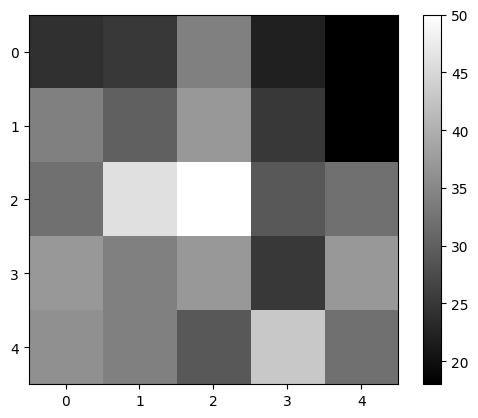

In [20]:
simpleplot(image)

In [21]:
image.flatten() # explain .flatten(). Explain graphically! 

array([24, 25, 34, 22, 18, 34, 30, 37, 25, 18, 32, 46, 50, 29, 32, 37, 34,
       37, 25, 37, 36, 34, 29, 43, 32], dtype=uint8)

In [81]:
simpleplot(image.flatten().unsqueeze())

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

Text(0.5, 0, 'Gray value uint8')

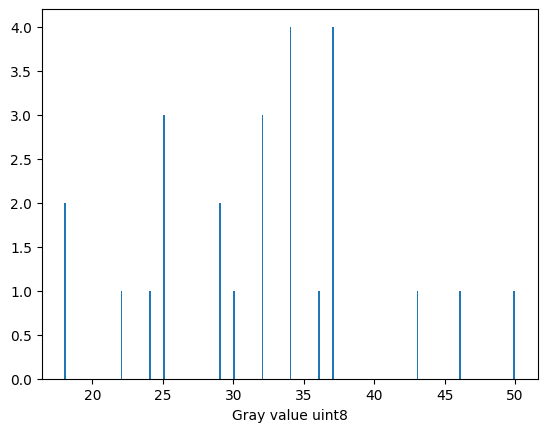

In [22]:
plt.hist(image.flatten(), bins = 256) 
plt.xlabel(f"Gray value {image.dtype}") # format string

In [23]:
# note: indexing discussed in previous section 

In [24]:
# Show them how to query images. Eva introduced that using lists 
# Go slower here! 
# draw a representation
image[0]

array([24, 25, 34, 22, 18], dtype=uint8)

In [25]:
image.shape

(5, 5)

In [26]:
#show first 2 

In [27]:
image

array([[24, 25, 34, 22, 18],
       [34, 30, 37, 25, 18],
       [32, 46, 50, 29, 32],
       [37, 34, 37, 25, 37],
       [36, 34, 29, 43, 32]], dtype=uint8)

### Task: Make a copy of image, and name it image2 (new variable). Turn the middle pixel of image2 to 255
And plot it
what color is it and why 
Learning goal: 
* What does "white" mean
* copying numpy arrays correctly 
* Repeat of indexing

### Pitfalls

In [28]:
image2 = image 

In [29]:
image2

array([[24, 25, 34, 22, 18],
       [34, 30, 37, 25, 18],
       [32, 46, 50, 29, 32],
       [37, 34, 37, 25, 37],
       [36, 34, 29, 43, 32]], dtype=uint8)

In [30]:
image2[2,2] = 255 # using a self-generated image, this will change the original image. Getting an image using plt.imread makes the original image read-only

### Task: Now inspect the pixel values of image and image2

In [31]:
image2

array([[ 24,  25,  34,  22,  18],
       [ 34,  30,  37,  25,  18],
       [ 32,  46, 255,  29,  32],
       [ 37,  34,  37,  25,  37],
       [ 36,  34,  29,  43,  32]], dtype=uint8)

In [32]:
image

array([[ 24,  25,  34,  22,  18],
       [ 34,  30,  37,  25,  18],
       [ 32,  46, 255,  29,  32],
       [ 37,  34,  37,  25,  37],
       [ 36,  34,  29,  43,  32]], dtype=uint8)

### Solution 

In [33]:
image = np.zeros([5,5], dtype = np.uint8) # in case it was overwritten
image = np.array(stack[0,12,250:255,250:255])

In [34]:
image2 = np.array(image)

In [35]:
image2 = np.array(image, copy = True)

In [36]:
image2 = image.copy() # another solution

In [37]:
image2[2, 2] = 255 

In [38]:
image2

array([[ 24,  25,  34,  22,  18],
       [ 34,  30,  37,  25,  18],
       [ 32,  46, 255,  29,  32],
       [ 37,  34,  37,  25,  37],
       [ 36,  34,  29,  43,  32]], dtype=uint8)

In [39]:
image

array([[24, 25, 34, 22, 18],
       [34, 30, 37, 25, 18],
       [32, 46, 50, 29, 32],
       [37, 34, 37, 25, 37],
       [36, 34, 29, 43, 32]], dtype=uint8)

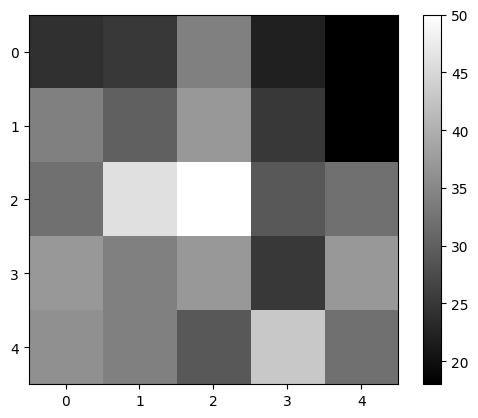

In [40]:
simpleplot(image)

In [41]:
#Task: asign a value of 255 to the central column... 

### Task: Make a copy of image and name it "frame". Assign to all pixels but the rim-pixels a value of 255
Tip: For-loops are not necessary here! 

### Solution

In [42]:
frame = np.array(image)

In [43]:
frame[1:-1, 1:-1] = 255
# or, less general: image3[1:4, 1:4] = 255

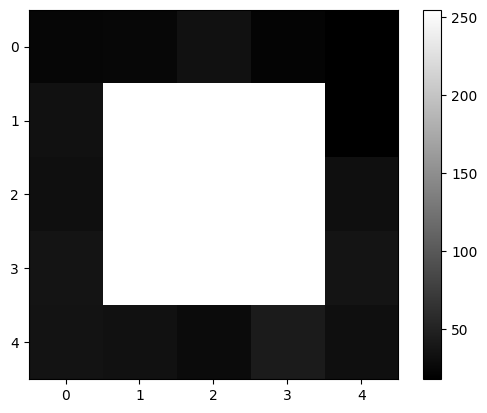

In [44]:
simpleplot(frame)

### Task: Make a copy of image and name it "vstripes". Assign a value of 255 to every other pixel in y to give it a vertical stripy pattern 

### Solution

In [45]:
vstripes = np.array(image)
ymax = len(image[0]) # TODO:  is this y or is this x?
for i in range(0, ymax, 2):
    vstripes[:, i] = 255

In [46]:
len(image[1])

5

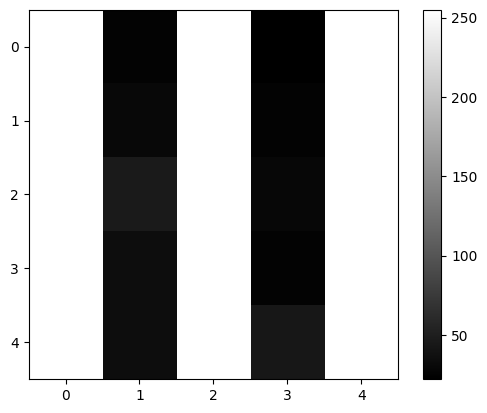

In [47]:
simpleplot(vstripes)

### Bonus task: generate an image "checkerboard" that has a checkerboard pattern. 
Tips: 
* there are multiple solutions
* you can use image or vstripes as a template 
* % is the modulo operator. The modulo operator yields the remainder from the division of the first argument by the second. Example: 5%3 = 2
* image.T transposes image. This means it flips the image values over the diagonal of image.
* ^ is an exclusive or. 

### Solution 1

In [48]:
checkerboard = vstripes ^ vstripes.T

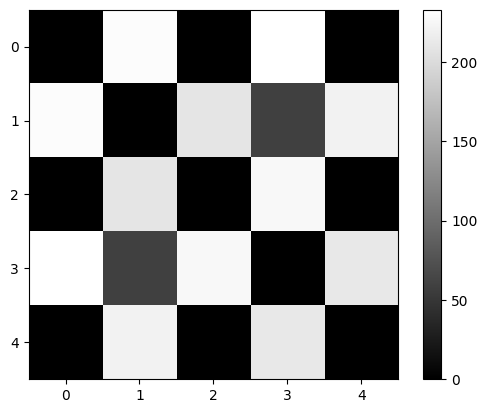

In [49]:
simpleplot(checkerboard)

In [50]:
checkerboard

array([[  0, 230,   0, 233,   0],
       [230,   0, 209,  59, 221],
       [  0, 209,   0, 226,   0],
       [233,  59, 226,   0, 212],
       [  0, 221,   0, 212,   0]], dtype=uint8)

### Solution 2

In [51]:
checkerboard2 = np.array(image)

In [52]:
for i in range(0, 5):
    for j in range(0, 5):
        checkerboard2[i, j] = 255 * ((i + j % 2) % 2)

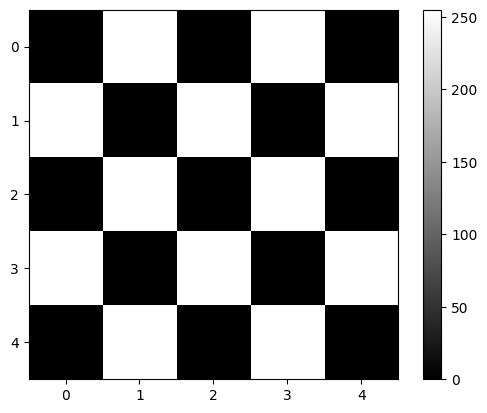

In [53]:
simpleplot(checkerboard2)


## 2.2. Numpy and multichannel/z-stacks
A

Use real image! 
Learning goal: 
* handling image axes
* avoiding int overflow, why it's a good idea to use numpy 

In [54]:
multichannel = np.random.randint(0, 256, size=(2, 5, 5), dtype=np.uint8)

In [55]:
multichannel.shape # print and describe

(2, 5, 5)

In [56]:
multichannel # print datatype

array([[[ 89, 172,  15, 252,  11],
        [161, 213, 180,  66, 199],
        [232, 192, 151, 104, 224],
        [215, 188,  12, 223, 194],
        [ 63, 118, 203, 247,  31]],

       [[247,  65,  61,   8, 173],
        [163, 222, 213,  91, 214],
        [ 52, 167,   9,  15, 187],
        [111,  24,   1, 111, 156],
        [  7,  90, 199,  68, 195]]], dtype=uint8)

### Task: plot the first channel

In [57]:
# also print the shape 
multichannel[0,:,:].shape

(5, 5)

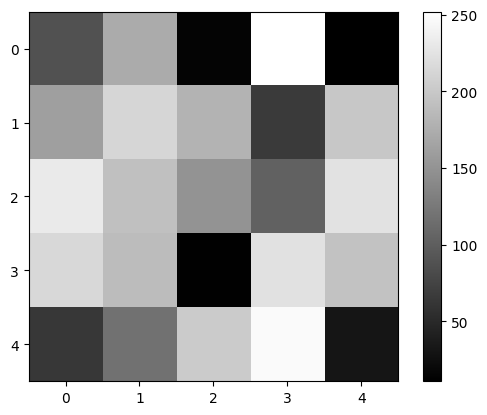

In [58]:
simpleplot(multichannel[0,:,:])

### Task: plot the second channel

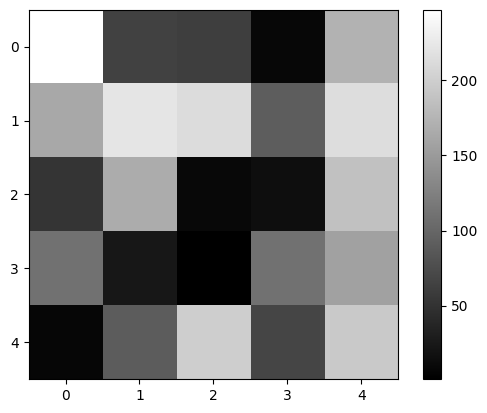

In [59]:
simpleplot(multichannel[1,:,:])

### Task: generate an image that is the mean of channel 0 and channel 1: "mean projection" 
TODO: Not of channels, of stacks
collapse image "multichannel" into a single-channel image by averaging the values in each channel at every pixel. The result should be a (5, 5) array where each value represents the mean of the two original channels at that position. This is called the mean projection

Tip: https://numpy.org/doc/2.2/reference/routines.statistics.html 

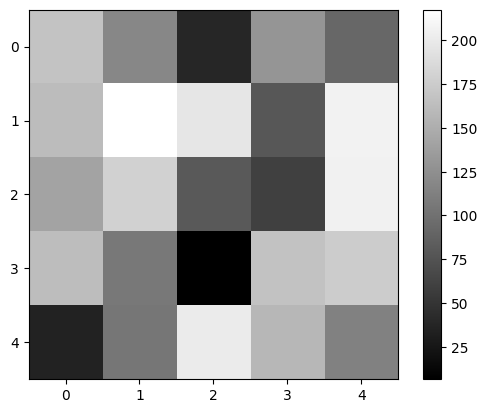

In [60]:
mean_of_chanels = np.mean(multichannel, axis = 0)
simpleplot(mean_of_chanels)

In [61]:
mean_of_chanels

array([[168. , 118.5,  38. , 130. ,  92. ],
       [162. , 217.5, 196.5,  78.5, 206.5],
       [142. , 179.5,  80. ,  59.5, 205.5],
       [163. , 106. ,   6.5, 167. , 175. ],
       [ 35. , 104. , 201. , 157.5, 113. ]])

### Task: sanity-check whether np.mean does what you expect it to do without using numpy 

### Pitfall

In [62]:
channel1 = multichannel[0,:,:]
channel2 = multichannel[1,:,:]

mean_of_chanels == (channel1 + channel2)/2 # integer overflow 

array([[False,  True,  True, False,  True],
       [False, False, False,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True, False, False],
       [ True,  True, False, False,  True]])

In [63]:
mean_of_chanels 

array([[168. , 118.5,  38. , 130. ,  92. ],
       [162. , 217.5, 196.5,  78.5, 206.5],
       [142. , 179.5,  80. ,  59.5, 205.5],
       [163. , 106. ,   6.5, 167. , 175. ],
       [ 35. , 104. , 201. , 157.5, 113. ]])

### Solution 1

In [64]:
(multichannel[0,:,:].astype(np.uint16) + multichannel[1,:,:].astype(np.uint16))/2 

array([[168. , 118.5,  38. , 130. ,  92. ],
       [162. , 217.5, 196.5,  78.5, 206.5],
       [142. , 179.5,  80. ,  59.5, 205.5],
       [163. , 106. ,   6.5, 167. , 175. ],
       [ 35. , 104. , 201. , 157.5, 113. ]])

In [65]:
mean_of_chanels == (multichannel[0,:,:].astype(np.uint16) + multichannel[1,:,:].astype(np.uint16))/2 #cast to unint16 #TODO: too advanced, remove!

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

### Solution 2

In [66]:
mean_of_chanels == (multichannel[0,:,:]/2 + multichannel[1,:,:]/2) # or divide by two first

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

### Task: compute the max projection 

Have a table of numpy operations instead of the link. Let the participants plot a bunch of them
task: max intensity and plot
Tip: https://numpy.org/doc/2.2/reference/routines.statistics.html 

### Solution

In [67]:
maxproject = np.max(multichannel, axis = 0)

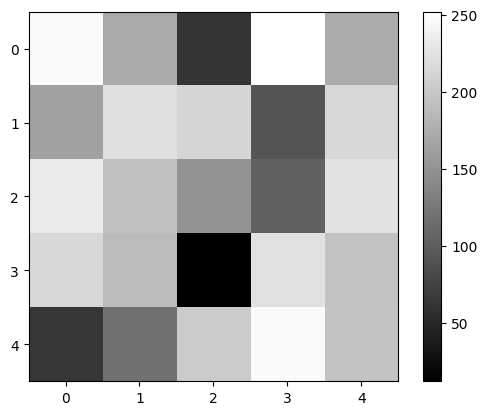

In [68]:
simpleplot(np.max(multichannel, axis = 0))

# 3. Visualization

## 3.1. Visualization using Matplotlib

In [69]:
def show_2_channels(image):
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    for i in range(2):
        im = axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].set_title(f'Channel {i}')
        axes[i].axis('off')
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

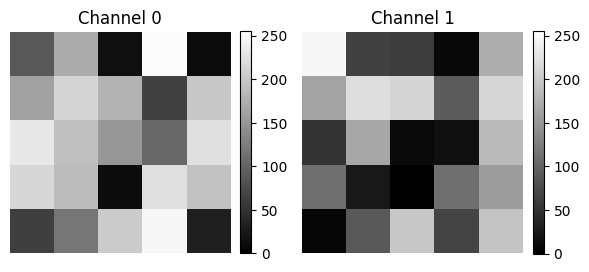

In [70]:
show_2_channels(multichannel)

In [71]:
# Task: plot all channels of the following image. Write a function show_all_channels(). 

In [72]:
threechannel = np.random.randint(0, 256, size=(3, 5, 5), dtype=np.uint8)

In [73]:
np.shape(threechannel)[0]

3

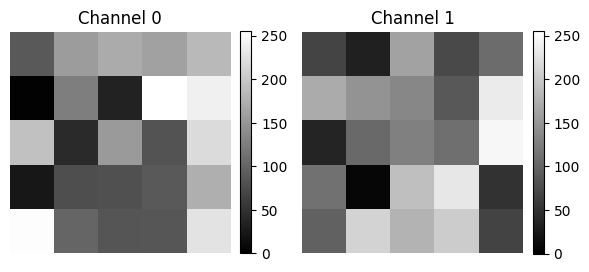

In [74]:
show_2_channels(threechannel)

In [75]:
def show_all_channels(image, n_channels = None):
    if not n_channels: 
        nchannels = np.shape(image)[0]
    fig, axes = plt.subplots(1, nchannels, figsize=(6, 3))
    for i in range(nchannels):
        im = axes[i].imshow(image[i, :, ], cmap='gray', vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].set_title(f'Channel {i}')
        axes[i].axis('off')
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

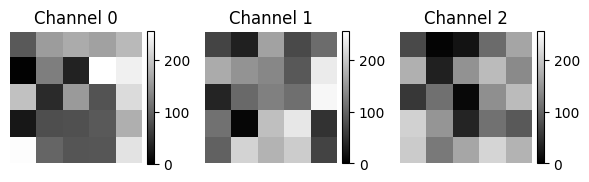

In [76]:
show_all_channels(threechannel)

## 3.2 Visualization using ndv

In [77]:
ndv.imshow?

Signature:
ndv.imshow(
    data: 'Any | DataWrapper',
    /,
    *,
    viewer_options: 'ArrayViewerModel | ArrayViewerModelKwargs | None' = None,
    display_model: 'ArrayDisplayModel | None' = None,
    **display_kwargs: 'Unpack[ArrayDisplayModelKwargs]',
) -> 'ArrayViewer'
Docstring:
Display an array or DataWrapper in a new `ArrayViewer` window.

This convenience function creates an `ArrayViewer` instance populated with `data`,
calls `show()` on it, and then runs the application.

Parameters
----------
data : Any | DataWrapper
    The data to be displayed. Any ArrayLike object or an `ndv.DataWrapper`.
display_model: ArrayDisplayModel, optional
    The display model to use. If not provided, a new one will be created.
viewer_options: ArrayViewerModel | ArrayViewerModelKwargs, optional
    Either a [`ArrayViewerModel`][ndv.models.ArrayViewerModel] or a dictionary of
    keyword arguments used to create one.
    See docs for [`ArrayViewerModel`][ndv.models.ArrayViewerModel] for options.

In [78]:
#Time (T), Channel (C), Z (Z), Y, X

In [79]:
image

array([[24, 25, 34, 22, 18],
       [34, 30, 37, 25, 18],
       [32, 46, 50, 29, 32],
       [37, 34, 37, 25, 37],
       [36, 34, 29, 43, 32]], dtype=uint8)